In [311]:
from types import SimpleNamespace

import numpy as np
import scipy as sc
from scipy import optimize
import sympy as sm
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sympy import *
from sympy import Eq 
import ipywidgets as widgets
from ipywidgets import interact
from scipy.optimize import minimize


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

from scipy import interpolate

import examQ2
import examQ3
from examQ2 import SalonModel
model = SalonModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

 First, we want to see how the $L^*(\tilde{w})$ comes out using math solvers without any use of parameters-values. We start by defining all our symbols and then taking the first order conditions and solve for $L^*(\tilde{w})$. We see that the results we get can be simplified, by deviding and multiplying, to the version provided in the question, and therefore have verified symbolically that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

 We also want to see if the values from both the provided formula and the one gotten through optimization reach the same answers given the $\tilde{w} = (1-\tau)*w$, for $G\in\left\{1.0 , 2.0\right\}$.

 We start by defining our baseline parameters, then we define the utility (using $\tilde{w}$) and the values for G. Then we print out the values for $L^*$ given both G=1.0 and G=2.0 that are found through both optimization and the given formula. We found that the results are the same, and therefore conclude that we have verified the function for $L^*(\tilde{w})$


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [312]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [313]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [314]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [315]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$

For kappa = 1.0, the labor that maximizes profit is 0.24998857151566414 (numerical)
For kappa = 1.0, the labor that maximizes profit is 0.25 (formula)
For kappa = 2.0, the labor that maximizes profit is 0.9999844500192897 (numerical)
For kappa = 2.0, the labor that maximizes profit is 1.0 (formula)


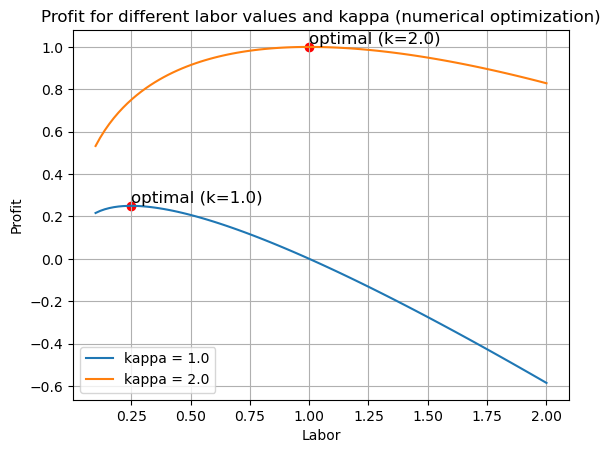

In [316]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Initialize the model
model = SalonModel()

# Define the objective function to be maximized (negative profit)
def objective(l):
    return -model.profit(l, kappa)

# Define a range of labor values
l_values = np.linspace(0.1, 2, 100)

# Define lists to store optimal labor values
optimal_labor_numerical = []

# For each kappa, find the labor that maximizes the profit
for kappa in [1.0, 2.0]:
    # Initialize the maximum profit and optimal labor variables
    max_profit = float('-inf')
    optimal_l = None
    
    # Calculate optimal labor directly
    formula_optimal_l = model.optimal_labor(kappa)
    optimal_labor_numerical.append(optimal_l)
    
    # Iterate over labor values and find the maximum profit
    for l in l_values:
        result = minimize(objective, [l], constraints=[{'type': 'ineq', 'fun': lambda l: l}])
        profit = -result.fun
        
        if profit > max_profit:
            max_profit = profit
            optimal_l = result.x[0]
    
    optimal_labor_numerical.append(optimal_l)
    
    # Plot profit
    profits = [model.profit(l, kappa) for l in l_values]
    plt.plot(l_values, profits, label=f'kappa = {kappa}')
    
    # Highlight optimal labor value
    plt.scatter([optimal_l], [max_profit], color='red')
    plt.text(optimal_l, max_profit, f'optimal (k={kappa})', fontsize=12, verticalalignment='bottom')
    
    print(f"For kappa = {kappa}, the labor that maximizes profit is {optimal_l} (numerical)")
    print(f"For kappa = {kappa}, the labor that maximizes profit is {formula_optimal_l} (formula)")

plt.xlabel('Labor')
plt.ylabel('Profit')
plt.legend()
plt.title('Profit for different labor values and kappa (numerical optimization)')
plt.grid(True)
plt.show()


Firstly, to numerically solve for the $\ell_t$ that maximizes profit given the profit equation which is done through optimization. Secondly, the optimal labor supply is calculated given the formula in **Question 1**. 

The code below does the following: 
 * Defines the profit function based on the problem statement.  
 * Calculates the value of labor (ell) that maximizes profit using a numerical optimization method (the minimize function from scipy.optimize). This value is the result of the optimization and is saved in optimal_ell. 
 * The code also calculates the value of labor that maximizes profit according to the given formula, and this value is saved in formula_ell. 
 * Finally, it prints the values of optimal_ell and formula_ell, as well as their difference, for each value of kappa. 

As indicated by the results, the optimal $\ell$ that maximizes profit when $\kappa\in\left\{1.0 , 2.0\right\}$ given the problem is almost the same when it is derived from using the formula given in **Question 1**. The diffrence is miniscule and is most likely due to the optimization coming close, but not exactly finding the exact value for optimal labor supply.



Furthermore, the figure of the profit function plotted for the two different values for kappa and the red dot indicates the optimal labor value that maximizes profit given the kappa values. 

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

The second part of the problem involves a dynamic version of the same model. The demand-shock, $\kappa_t$, now follows an autoregressive model of order 1 (AR(1)) in logs, and there are fixed costs, $\iota$, associated with hiring or firing employees. Future profits are discounted with a monthly factor of $R$.

The AR(1) model in logs is a stochastic process where the log of the demand-shock at time $t$ is a function of the log of the demand-shock at time $t-1$ and a random shock, $\epsilon_t$.

The respective task is to calculate the expected value of the hair salon over a planning horizon of 120 months (10 years), given this new model and the labor policy from the first question. The expected value, $H$, is the average of $h$ over $K$ random shock series.

In the examQ3 file is the code used to find solutions to questions 1-2. Information about the py file:

Define the given parameters, including the new ones.
Generate the shock series, $\epsilon_t$, following a normal distribution with mean $-0.5\sigma_{\epsilon}^2$ and standard deviation $\sigma_{\epsilon}$, for $K$ different series and 120 time steps.
Calculate the demand-shock series, $\kappa_t$, using the AR(1) model for each series.
Calculate the labor series, $\ell_t$, using the labor policy from the first question for each series.
Calculate $h$ for each series using the formula given in the question.
Calculate the expected value of the salon, $H$, as the average of $h$ over all series.


Due to Question 3, where there is a new policy implemented which is based on the previous labor and the introduction of Delta which decides the labor supply in each period, Delta in this question is set as zero to get the expected value of the salon given the policy given in question 3. 

In [317]:
model = SalonModel()
H = model.calculate_H(Delta=0)
print(f"The expected value of the salon is {H}")

The expected value of the salon is 27.715285782088245


The answer changes each time this notebook file is run and therefore to pinpoint where the expected value lies, there needs to be a graph of the distribution which is coded below. 

Mean value of H: 27.71528578208824
Standard deviation of H: 3.552713678800501e-15


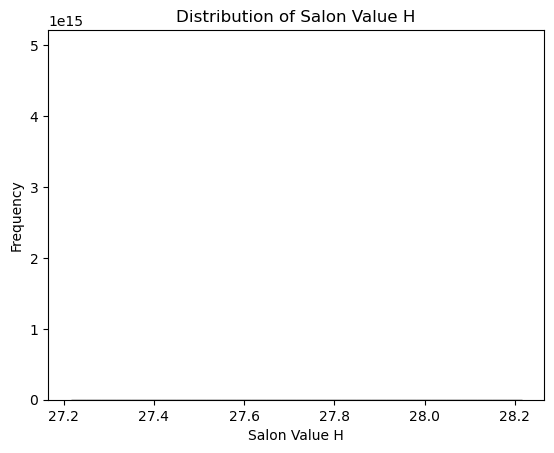

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run the simulation for a number of iterations
n_iterations = 1000
H_values = [SalonModel().calculate_H(Delta=0) for _ in range(n_iterations)]

# Print some statistics
print(f"Mean value of H: {np.mean(H_values)}")
print(f"Standard deviation of H: {np.std(H_values)}")

# Plotting the distribution using seaborn
sns.histplot(H_values, bins=30, kde=True)
plt.title('Distribution of Salon Value H')
plt.xlabel('Salon Value H')
plt.ylabel('Frequency')
plt.show()

The expected value of the salon, H, is the average of h across all series where h is the sum of discounted profits for each series (each month in a 10 year period). So, the value of H represents an average profit over the 10-year period. The graph inficates that the frequency of H values is most commonly found between 27.6-27.8.  

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

The code below set the two different delta values and sets the number of simulations as well as initalizing the wins of each Delta. Then it runs the simulations by calculating each salon value under each Delta and then compares the two H values and in a loop. Lastly, the code prints the results of the simulation and the respective inital calulation of the value of the salon under each delta. 


In [319]:
# Initialize variables
old_delta = 0
new_delta = 0.05
num_simulations = 100
delta_0_wins = 0
delta_005_wins = 0

# Run simulations
for _ in range(num_simulations):
    model = SalonModel()  # Assuming optimal K has been chosen

    # Calculate H for the old Delta value
    old_delta = 0
    old_H = model.calculate_H(Delta=old_delta)

    # Calculate H for the new Delta value
    new_delta = 0.05
    new_H = model.calculate_H(Delta=new_delta)

    # Compare the two H values and increment respective win counters
    if new_H > old_H:
        delta_005_wins += 1
    else:
        delta_0_wins += 1

# Calculate frequencies
delta_0_freq = delta_0_wins / num_simulations
delta_005_freq = delta_005_wins / num_simulations

# Print results
print(f"Delta = 0 improves profitability in {delta_0_freq * 100}% of simulations the value of the salon is {old_H}")
print(f"Delta = 0.05 improves profitability in {delta_005_freq * 100}% of simulations and the value of the salon is {new_H}")


Delta = 0 improves profitability in 0.0% of simulations the value of the salon is 27.715285782088245
Delta = 0.05 improves profitability in 100.0% of simulations and the value of the salon is 28.39439144588796


As kappa is set to 1000 iterations there are going to be different values each time, therefore doing the same as in the answer to question 2 is done to get the distribution of the Salon value when Delta=0.05. 

Mean value of H: 28.39439144588795
Standard deviation of H: 7.105427357601002e-15


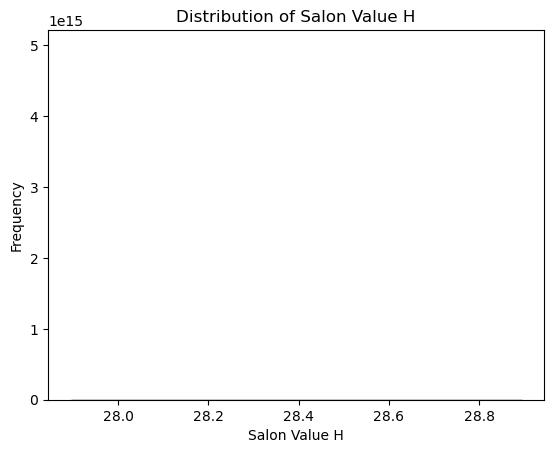

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run the simulation for a number of iterations
n_iterations = 1000
H_values = [SalonModel().calculate_H(Delta=0.05) for _ in range(n_iterations)]

#Print statistics 
print(f"Mean value of H: {np.mean(H_values)}")
print(f"Standard deviation of H: {np.std(H_values)}")

# Plotting the distribution using seaborn
sns.histplot(H_values, bins=30, kde=True)
plt.title('Distribution of Salon Value H')
plt.xlabel('Salon Value H')
plt.ylabel('Frequency')
plt.show()


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

The code is fairly straight forward below as most of the code is in the examQ3 file. The code call the optimal delta function and prints out the value.

In [321]:
model = SalonModel()
optimal_delta = model.optimal_delta()
print(f"The optimal Delta is {optimal_delta}")


The optimal Delta is 0.0764648161830407


Varies obviously each time the notebook is run but lies generally around 0.7-0.8. Below is the delta plotted to illustrate the results. 

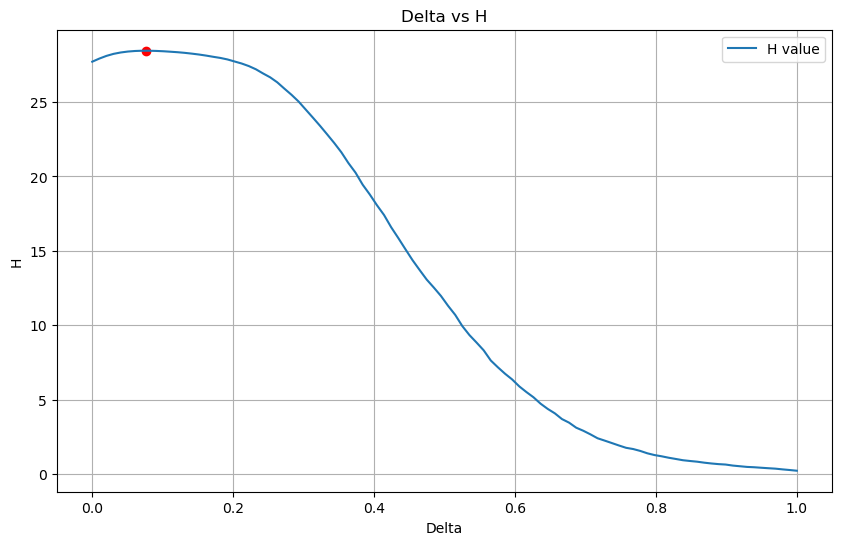

In [322]:
# Calculate H for a range of Delta values
deltas = np.linspace(0, 1, 100)  # Adjust the range and number of points as needed
H_values = [model.calculate_H(delta) for delta in deltas]

# Plot Delta vs H
plt.figure(figsize=(10, 6))
plt.plot(deltas, H_values, label="H value")
plt.scatter([optimal_delta], [model.calculate_H(optimal_delta)], color='red')  # mark the optimal point
plt.title("Delta vs H")
plt.xlabel("Delta")
plt.ylabel("H")
plt.legend()
plt.grid(True)
plt.show()

The graph shows that H remains relatively flat from 0.0 to 0.2 and gradually decreases as Delta approaches 1.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



The adjustment to the model involves changing the way labor adjustments are handled within the hair salon.

Previously, a fixed adjustment cost was used, meaning any changes in labor levels would incur a certain cost, irrespective of the magnitude of the change. This was a rigid model where even minute adjustments could bring about significant costs. The optimization routine under such a setting yielded a higher optimal Delta, indicating that the model preferred fewer, but larger adjustments to labor levels to minimize the frequency of incurring the fixed adjustment cost.

The recent policy change introduces a more flexible adjustment cost function. Here, the adjustment cost is zero up to a certain threshold, and then jumps to a fixed level. This means that smaller changes in the number of hairdressers do not incur any cost. Hence, the model is incentivized to make smaller labor adjustments frequently within the threshold to minimize costs, leading to a lower optimal Delta.

In [323]:
# Instantiate the model
model = SalonModel()
H_adjusted = model.calculate_H_adjusted(Delta=0)
print(H_adjusted)

28.80129769265054


In [324]:
# Instantiate the model
model = SalonModel()
H_adjusted = model.calculate_H_adjusted(Delta=0.05)
print(H_adjusted)


28.74775357674712


In [325]:
model = SalonModel()
optimal_delta_adjusted = model.optimal_delta_adjusted()
print(f"The optimal Delta is {optimal_delta_adjusted}")

The optimal Delta is 0.00615089907831626


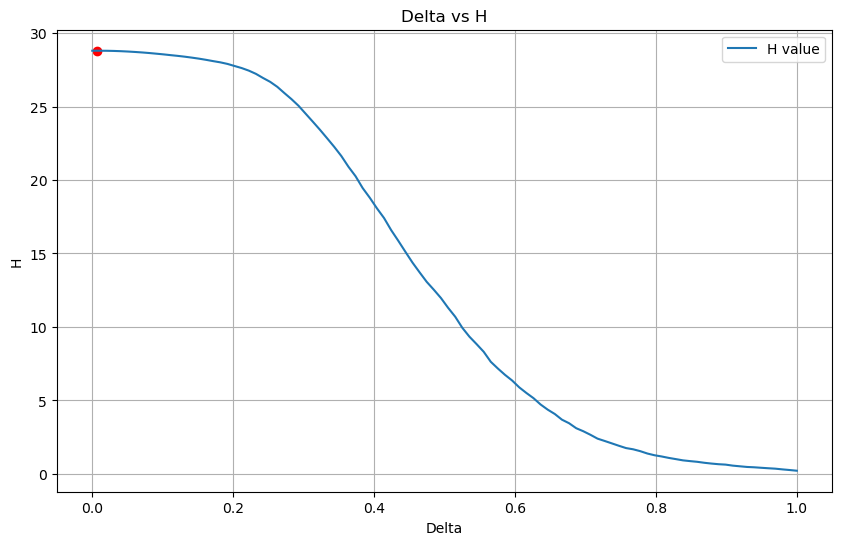

In [326]:
# Calculate H for a range of Delta values
deltas = np.linspace(0, 1, 100)  # Adjust the range and number of points as needed
H_values = [model.calculate_H_adjusted(delta) for delta in deltas]

# Plot Delta vs H
plt.figure(figsize=(10, 6))
plt.plot(deltas, H_values, label="H value")
plt.scatter([optimal_delta_adjusted], [model.calculate_H_adjusted(optimal_delta_adjusted)], color='red')  # mark the optimal point
plt.title("Delta vs H")
plt.xlabel("Delta")
plt.ylabel("H")
plt.legend()
plt.grid(True)
plt.show()

The adjustment_cost function that implemented imposes a step function as a cost of changing the number of employees. Specifically, the cost is zero up to a certain threshold, and then jumps to a fixed level. This essentially means that small changes in the number of hairdressers does not incur any cost.

Hence, when the model is trying to find the optimal $\Delta$, it's incentivized to make small labor adjustments frequently (within the threshold) to minimize costs. This is why the optimal $\Delta$ is close to zero.

The original $\Delta$ around 0.7 was under the assumption that there's a fixed cost for any change in labor, hence larger $\Delta$ means fewer adjustments and lower cost.

In essence, the step function adjustment cost incentivizes smaller, more frequent adjustments, hence a smaller $\Delta$ is optimal. The fixed cost per adjustment incentivizes fewer, larger adjustments, hence a larger $\Delta$ was optimal.

In [327]:
for threshold in np.linspace(0, 1, 21):  # test thresholds between 0 and 2
    model.par.threshold = threshold
    print(f"For threshold={threshold:.2f}, optimal delta={model.optimal_delta_adjusted():.5f}")

For threshold=0.00, optimal delta=0.00615
For threshold=0.05, optimal delta=0.00615
For threshold=0.10, optimal delta=0.00615
For threshold=0.15, optimal delta=0.00615
For threshold=0.20, optimal delta=0.00615
For threshold=0.25, optimal delta=0.00615
For threshold=0.30, optimal delta=0.00615
For threshold=0.35, optimal delta=0.00615
For threshold=0.40, optimal delta=0.00615
For threshold=0.45, optimal delta=0.00615
For threshold=0.50, optimal delta=0.00615
For threshold=0.55, optimal delta=0.00615
For threshold=0.60, optimal delta=0.00615
For threshold=0.65, optimal delta=0.00615
For threshold=0.70, optimal delta=0.00615
For threshold=0.75, optimal delta=0.00615
For threshold=0.80, optimal delta=0.00615
For threshold=0.85, optimal delta=0.00615
For threshold=0.90, optimal delta=0.00615
For threshold=0.95, optimal delta=0.00615
For threshold=1.00, optimal delta=0.00615


It appears that changes in the threshold do not affect the optimal delta in this case. It could also be because the adjustment costs are not substantial enough to influence the optimal choice of delta.

In either case, it's important to remember that while the model's results indicate the threshold doesn't impact the optimal delta, the threshold could still affect other aspects of decision-making or business operations. For example, it could affect how frequently the need i to adjust the labor force, or the timing of those adjustments.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [328]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [329]:
import examQ3
from examQ3 import refined_global_optimizer 

#The settings 
func = griewank
num_parameters = 2
bounds = [-600, 600] # Define bounds
tol = 1e-8 # Define tolerance
K_warmup1 = 10 # Define warmup iterations
K_max = 1000 # Define maximum iterations

Using the refined global optimizer which is implemented in the examQ3 file, the effective initial guesses are illustrate below and how they vary with the iteration counter k for the griewank function which is defined in problem 3. 

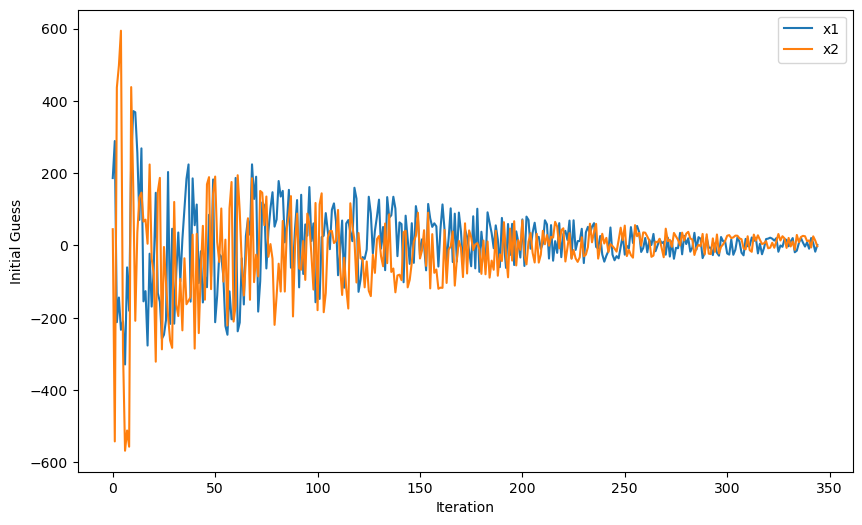

In [330]:
best_x_10, best_f_10, initial_guesses_10 = refined_global_optimizer(func, num_parameters, bounds, tol, K_warmup1, K_max)

# Plot initial guesses and iterations.
plt.figure(figsize=(10,6))
plt.plot([x[0] for x in initial_guesses_10], label='x1')
plt.plot([x[1] for x in initial_guesses_10], label='x2')
plt.xlabel('Iteration')
plt.ylabel('Initial Guess')
plt.legend()
plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

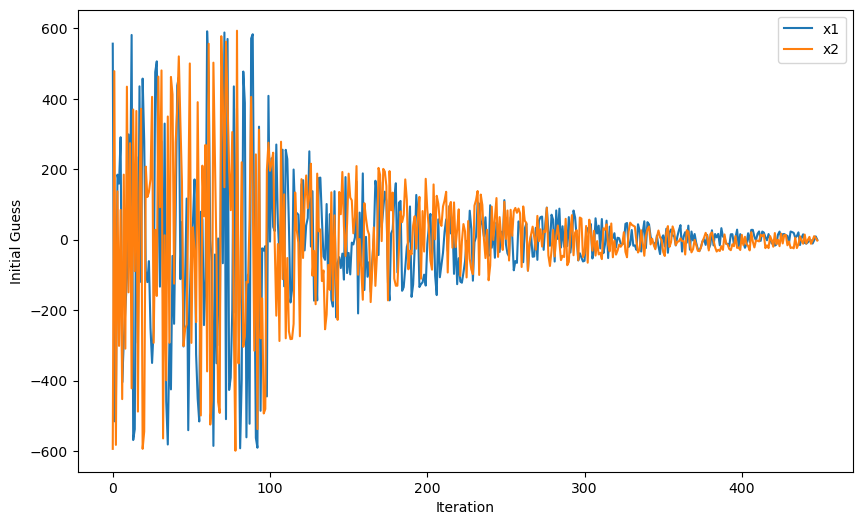

In [331]:
#The new settings with K_warmup = 100 instead of the before assumption of K_warmup = 10
K_warmup2 = 100 

best_x_100, best_f_100, initial_guesses_100 = refined_global_optimizer(func, num_parameters,bounds, tol, K_warmup2, K_max)

# Plot initial guesses and iterations.
plt.figure(figsize=(10,6))
plt.plot([x[0] for x in initial_guesses_100], label='x1')
plt.plot([x[1] for x in initial_guesses_100], label='x2')
plt.xlabel('Iteration')
plt.ylabel('Initial Guess')
plt.legend()
plt.show()

In [332]:
from examQ3 import run_optimization_and_measure_time
best_x_10, best_f_10, time_10 = run_optimization_and_measure_time(func, num_parameters, bounds, tol, K_warmup1, K_max)
best_x_100, best_f_100, time_100 = run_optimization_and_measure_time(func, num_parameters, bounds, tol, K_warmup2, K_max)

Execution time with K_warmup = 10: 0.6460058689117432
Best solution with K_warmup = 10: [-9.76263295e-09 -1.66888814e-08]
Function value at best solution: 1.1102230246251565e-16
Execution time with K_warmup = 100: 0.6812789440155029
Best solution with K_warmup = 100: [ 6.82581185e-09 -1.36802344e-08]
Function value at best solution: 0.0


The choice of warmup iterations, $\underline{K}$, can indeed influence the performance of the global optimizer, particularly for a function like the Griewank function, which has many local minima.

In general, the warmup iterations are used to explore the search space without any bias towards the currently best solution. Therefore, a larger number of warmup iterations can allow the optimizer to explore more of the search space before it starts to focus on the region around the best found solution. This can be beneficial if the global minimum is located in a region of the search space that is not likely to be sampled in the initial iterations.

However, having more warmup iterations also means that it takes longer before the optimizer can start to exploit the information about the best found solution. Therefore, if the global minimum can be found relatively quickly (e.g., within the first 10 iterations), then having a larger number of warmup iterations could slow down the convergence. 

Given these considerations, it's not surprising that you find the execution time with $\underline{K} = 10$ to be faster than with $\underline{K} = 100$. If the global minimum is found within the first 10 iterations, then the optimizer can start to exploit this information earlier when $\underline{K} = 10$, which could lead to faster convergence.

However, it's also important to consider the quality of the found solution. Even if the optimizer with $\underline{K} = 10$ converges faster, it might not find the global minimum if it is located in a region of the search space that is not explored during the warmup iterations. In such cases, having a larger number of warmup iterations could lead to a better final solution, even if it takes longer.

However the results for the berst soluton indicate that both $\underline{K}$ values of 10 and 100 managed to find solutions close to the global minimum. The best solutions found are very close to (0,0) as expected and the function values at these points are near zero, suggesting these are very good solutions. 

In conclusion, given the global minimum of the Griewank function is at (0,0) and the function value at this point is 0, both runs effectively found the global minimum of the function. But, setting $\underline{K}=10$ resulted in a quicker convergence to the solution compared to $\underline{K}=10$.

This result might be due to the nature of the Griewank function and the optimizer used (BFGS). In this particular scenario, it seems that more warmup iterations don't necessarily improve the speed or the quality of the solutions, and could potentially take longer due to the increased number of function evaluations. The optimal settings may depend on the specific problem and optimization method.